In [60]:
import pandas as pd

absence=pd.read_csv("C:/Users/hlandolsi/Desktop/turnover/data/raw_data/dimabsence.csv")
assignment=pd.read_csv("C:/Users/hlandolsi/Desktop/turnover/data/raw_data/dimassignment.csv")
contract=pd.read_csv("C:/Users/hlandolsi/Desktop/turnover/data/raw_data/dimcontract.csv")
employee=pd.read_csv("C:/Users/hlandolsi/Desktop/turnover/data/raw_data/dimemployee.csv")
status=pd.read_csv("C:/Users/hlandolsi/Desktop/turnover/data/raw_data/dimstatus.csv")
entryexit=pd.read_csv("C:/Users/hlandolsi/Desktop/turnover/data/raw_data/dimentryexit.csv")

In [61]:
absence.head()

,ABSENCE_KEY,EMP_CODE,ABSENCE_CODE,ABSENCE_HOURS,MIN_ABSENCE_DAYS,ABSENCE_START_DATE,ABSENCE_END_DATE,ABSENCE_LIB
0,702_2012-10-08_2012-10-13_MAL,702,MAL,0.0,6.0,2012-10-08,2012-10-13,Maladie
1,705_2015-10-15_2015-10-16_CL1,705,CL1,0.0,2.0,2015-10-15,2015-10-16,Congés payés - Ouvrable - Juin - Mai
2,719_2012-10-11_2012-10-13_MAL,719,MAL,0.0,3.0,2012-10-11,2012-10-13,MALADIE ORDINAIRE
3,1301_2015-10-08_2015-10-13_MAL,1301,MAL,0.0,6.0,2015-10-08,2015-10-13,Maladie
4,1301_2015-10-08_2015-10-10_MAL,1301,MAL,0.0,3.0,2015-10-08,2015-10-10,MALADIE ORDINAIRE


### Check dimabsence dataframe

In [17]:
absence.head()

,ABSENCE_KEY,EMP_CODE,ABSENCE_CODE,ABSENCE_HOURS,MIN_ABSENCE_DAYS,ABSENCE_START_DATE,ABSENCE_END_DATE,ABSENCE_LIB
0,702_2012-10-08_2012-10-13_MAL,702,MAL,0.0,6.0,2012-10-08,2012-10-13,Maladie
1,705_2015-10-15_2015-10-16_CL1,705,CL1,0.0,2.0,2015-10-15,2015-10-16,Congés payés - Ouvrable - Juin - Mai
2,719_2012-10-11_2012-10-13_MAL,719,MAL,0.0,3.0,2012-10-11,2012-10-13,MALADIE ORDINAIRE
3,1301_2015-10-08_2015-10-13_MAL,1301,MAL,0.0,6.0,2015-10-08,2015-10-13,Maladie
4,1301_2015-10-08_2015-10-10_MAL,1301,MAL,0.0,3.0,2015-10-08,2015-10-10,MALADIE ORDINAIRE


In [18]:
# drop unnecessary columns! :
absence=absence.drop('ABSENCE_CODE', axis=1)
absence.head()

,ABSENCE_KEY,EMP_CODE,ABSENCE_HOURS,MIN_ABSENCE_DAYS,ABSENCE_START_DATE,ABSENCE_END_DATE,ABSENCE_LIB
0,702_2012-10-08_2012-10-13_MAL,702,0.0,6.0,2012-10-08,2012-10-13,Maladie
1,705_2015-10-15_2015-10-16_CL1,705,0.0,2.0,2015-10-15,2015-10-16,Congés payés - Ouvrable - Juin - Mai
2,719_2012-10-11_2012-10-13_MAL,719,0.0,3.0,2012-10-11,2012-10-13,MALADIE ORDINAIRE
3,1301_2015-10-08_2015-10-13_MAL,1301,0.0,6.0,2015-10-08,2015-10-13,Maladie
4,1301_2015-10-08_2015-10-10_MAL,1301,0.0,3.0,2015-10-08,2015-10-10,MALADIE ORDINAIRE


In [19]:
absence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13722 entries, 0 to 13721
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ABSENCE_KEY         13722 non-null  object 
 1   EMP_CODE            13722 non-null  int64  
 2   ABSENCE_HOURS       13722 non-null  float64
 3   MIN_ABSENCE_DAYS    13722 non-null  float64
 4   ABSENCE_START_DATE  13722 non-null  object 
 5   ABSENCE_END_DATE    13722 non-null  object 
 6   ABSENCE_LIB         13722 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 750.6+ KB


##### we should convert types of : EMP_CODE as string, ABSENCE_START_DATE as date, ABSENCE_END_DATE as date, ABSENCE_LIB as categorical.

In [20]:
absence['EMP_CODE'] = absence['EMP_CODE'].astype('str')
absence['ABSENCE_END_DATE'] = pd.to_datetime(absence['ABSENCE_END_DATE'],format='%Y-%m-%d',infer_datetime_format=True,errors='coerce')
absence['ABSENCE_START_DATE'] = pd.to_datetime(absence['ABSENCE_START_DATE'],format='%Y-%m-%d',infer_datetime_format=True,errors='coerce')
absence['ABSENCE_LIB'] = absence['ABSENCE_LIB'].astype('category')
absence.dtypes

ABSENCE_KEY                   object
EMP_CODE                      object
ABSENCE_HOURS                float64
MIN_ABSENCE_DAYS             float64
ABSENCE_START_DATE    datetime64[ns]
ABSENCE_END_DATE      datetime64[ns]
ABSENCE_LIB                 category
dtype: object

##### let's examine our categorical column 'ABSENCE_LIB'

In [21]:
absence['ABSENCE_LIB'].describe()

count                                             13722
unique                                              155
top       Maladie                                      
freq                                               4024
Name: ABSENCE_LIB, dtype: object

##### It seems like we have to collapse our categories!

In [22]:
pd.set_option('display.max_rows', None) 
print(absence['ABSENCE_LIB'].value_counts())

Maladie                                          4024
MALADIE ORDINAIRE                                3507
CONGE LONGUE MALADIE                              379
Maternité                                         367
Congé Maternité                                   367
Congés payés - Ouvrable - Juin -  Mai             253
Accident de travail                               219
CONGE FORMATION                                   204
Congé-formation                                   204
Formation(interne ou externe)                     204
Accident du travail                               198
CONGE LONGUE DUREE EN SERVICE                     186
CONGE FORMATION:CAS DEROGATOIRE                   176
Congé annuel                                      173
CONGE LONGUE DUREE HORS SERVICE                   171
Congé payé légal                                  167
Congé payé                                        167
ABSENCE COVIDCHECK                                164
Accident                    

let's look for general patterns so that we can define a function which is able to generalize this task on unseen data. what should our categories be? so wherever we see the word or other related words that has the same meaning <br>
**Formation** <br>
**Familiale** : Paternité, maternité, enfant, famille, mariage, proche aidant... and other words fall into those categories <br>
**Congé non payé** : sans solde, non rémunéré ... and other words shall fall into this category <br>
**Congé payé** <br>
**Maladie** <br>
**Accident** <br>
**Autre congé** : This should takes all the leave or time off non specified <br>
**Autres** <br>
so here we have collapsed our categories to only 7. we should implement functions that can automatically assign each value to one of this groups!




In [23]:
import re
df = absence.copy()
df['ABSENCE_LIB'] = df['ABSENCE_LIB'].apply(lambda x: re.sub(r'\s+', ' ', x).strip().lower())
df['ABSENCE_LIB']

0                                              maladie
1                 congés payés - ouvrable - juin - mai
2                                    maladie ordinaire
3                                              maladie
4                                    maladie ordinaire
5                                    maladie ordinaire
6                                              maladie
7                                    maladie ordinaire
8                                  accident de travail
9                                  accident de travail
10                                 accident de travail
11                                 accident de travail
12                                 accident du travail
13                                 accident de travail
14                                   maladie ordinaire
15                                             maladie
16                                   maladie ordinaire
17                                   maladie ordinaire
18        

In [32]:
class Transform:
    def __init__(self, dataframe):
        self.dataframe = dataframe


    def apply_mapping(self, column_name, mapping_dict):
        def convert_lib(lib):
            for category, word_list in mapping_dict.items():
                for word in word_list:
                    pattern = rf'\b\w*{re.escape(word)}\w*\b'
                    if re.search(pattern, lib, re.IGNORECASE):
                        return category
            return 'Autres'
        
        self.dataframe[column_name] = self.dataframe[column_name].apply(convert_lib)

mapping_dict = {
    'Familiale': ['parent', 'enfant', 'maternit', 'paternit', 'parent', 'familial', 'mariage', 'proche','grossesse','parental','naissance'],
    'formation': ['formation', 'apprentissage'],
    'congé non payé': ['non pay', 'sans solde', 'absence', 'non remun', 'longue dur','sabbatique'],
    'autre congé': ['vacances', 'remun', 'annuel', 'payant', 'compens','pay'],
    'maladie': ['maladie', 'sant', 'covid','quarantaine'],
    'accident': ['accident', 'incident']
}


transformer = Transform(df)
transformer.apply_mapping('ABSENCE_LIB', mapping_dict)
print(df['ABSENCE_LIB'].value_counts())


maladie           7974
Familiale         1663
congé non payé    1102
autre congé        870
formation          816
accident           733
Autres             564
Name: ABSENCE_LIB, dtype: int64


now our column 'ABSENCE_LIB' is almost clean! lets move to the next step. we should verify data integrity and consitency

In [34]:
min1 = df['ABSENCE_START_DATE'].min()
max1 = df['ABSENCE_START_DATE'].max()
min2 = df['ABSENCE_START_DATE'].min()
max2 = df['ABSENCE_START_DATE'].max()
print(min1,max1,min2,max2)

2008-01-12 00:00:00 2028-12-01 00:00:00 2008-01-12 00:00:00 2028-12-01 00:00:00


In [18]:
mask = df['ABSENCE_END_DATE']<df['ABSENCE_START_DATE']
df[mask]

,ABSENCE_KEY,EMP_CODE,ABSENCE_HOURS,MIN_ABSENCE_DAYS,ABSENCE_START_DATE,ABSENCE_END_DATE,ABSENCE_LIB,old_lib


so there is no inconsistency in the dates of leaves however we have out of range data we should remove them and still check for inconsistency anyway for future unseen data

In [19]:
from datetime import datetime
import numpy as np

def remove_out_of_range_date(df,column_name):
    # Get today's date
    today = datetime.now()
    df[column_name]=pd.to_datetime(df[column_name])
    df.loc[df[column_name] > pd.Timestamp(today), column_name] = pd.NaT


In [20]:
remove_out_of_range_date(df,'ABSENCE_START_DATE')
remove_out_of_range_date(df,'ABSENCE_END_DATE')
df.isna().sum()

ABSENCE_KEY             0
EMP_CODE                0
ABSENCE_HOURS           0
MIN_ABSENCE_DAYS        0
ABSENCE_START_DATE    817
ABSENCE_END_DATE      833
ABSENCE_LIB             0
old_lib                 0
dtype: int64

In [21]:
today = datetime.now().date()

In [22]:
today

datetime.date(2023, 8, 27)

In [23]:
def col2_should_be_greater_than_col1(df,col1,col2):
    # Convert date columns to datetime type
    df[col1] = pd.to_datetime(df[col1])
    df[col2] = pd.to_datetime(df[col2])

    # Create a mask for the condition
    mask = df[col2] < df[col1]

    # Replace values with NaN where the mask is True
    df.loc[mask, [col1, col2]] = np.nan

    return df

### Check assignment dataframe

In [24]:
assignment.head()

,ASSIGNMENT_KEY,EMP_CODE,ASSIGNMENT_START_DATE,ASSIGNMENT_END_DATE,ASSIGNMENT_ORGUNIT_CODE,ASSIGNMENT_OFFICE_CODE,ASSIGNMENT_JOB_CODE,ASSIGNMENT_JOB_LIB
0,863_20140101_29991231,863,2014-01-01,2999-12-31 00:00:00,INT200,,FRP01,Analyste ...
1,877_20140101_29991231,877,2014-01-01,2999-12-31 00:00:00,INT200,,FRP01,Analyste ...
2,878_20140101_29991231,878,2014-01-01,2999-12-31 00:00:00,INT200,,FRP01,Analyste ...
3,879_20140101_29991231,879,2014-01-01,2999-12-31 00:00:00,INT200,,FRP01,Analyste ...
4,120671_20201111_29991231,120671,2020-11-11,2999-12-31 00:00:00,BEE001,BEE052,BEE05,Reponsable ...


In [38]:
# drop unnecessary columns! :
assignment=assignment.drop(['ASSIGNMENT_ORGUNIT_CODE','ASSIGNMENT_OFFICE_CODE','ASSIGNMENT_JOB_CODE'], axis=1)

In [26]:
assignment.head()

,ASSIGNMENT_KEY,EMP_CODE,ASSIGNMENT_START_DATE,ASSIGNMENT_END_DATE,ASSIGNMENT_JOB_LIB
0,863_20140101_29991231,863,2014-01-01,2999-12-31 00:00:00,Analyste ...
1,877_20140101_29991231,877,2014-01-01,2999-12-31 00:00:00,Analyste ...
2,878_20140101_29991231,878,2014-01-01,2999-12-31 00:00:00,Analyste ...
3,879_20140101_29991231,879,2014-01-01,2999-12-31 00:00:00,Analyste ...
4,120671_20201111_29991231,120671,2020-11-11,2999-12-31 00:00:00,Reponsable ...


In [39]:
assignment['ASSIGNMENT_START_DATE'] = pd.to_datetime(assignment['ASSIGNMENT_START_DATE'],format='%Y-%m-%d',infer_datetime_format=True,errors='coerce')
assignment['ASSIGNMENT_END_DATE'] = pd.to_datetime(assignment['ASSIGNMENT_END_DATE'],format='%Y-%m-%d',infer_datetime_format=True,errors='coerce')
assignment['ASSIGNMENT_JOB_LIB'] = assignment['ASSIGNMENT_JOB_LIB'].astype('category')
assignment.dtypes

ASSIGNMENT_KEY                   object
EMP_CODE                          int64
ASSIGNMENT_START_DATE    datetime64[ns]
ASSIGNMENT_END_DATE      datetime64[ns]
ASSIGNMENT_JOB_LIB             category
dtype: object

In [28]:
assignment['ASSIGNMENT_JOB_LIB'].describe()

count                                                 19759
unique                                                   82
top       Spécialiste Ressources Humaines               ...
freq                                                  10150
Name: ASSIGNMENT_JOB_LIB, dtype: object

In [29]:
print(assignment['ASSIGNMENT_JOB_LIB'].value_counts())

Spécialiste Ressources Humaines                                 10150
Analyste                                                         2938
_Directeur Général                                               1219
Directeur Général                                                 938
_Responsable                                                      822
Reponsable                                                        806
Assistant de Planification                                        404
Directeur                                                         346
Secrétaire                                                        321
Emploi 1                                                          272
Secrétaire général                                                194
Expert Logistique                                                 121
EMPLOI APRRENTI NIV 3 E1                                          102
Analyste-programmeur                                               78
Informaticien       

In [40]:
# create a mapping dictionnary to collapse categories : 
collapse = {
    'Directeurs': ['directeur','ponsable','chef','direction','general','général'],
    'Secrétariat général': ['assistant','secrétaire','secretaire'],
    'Production': ['logistique','machin'],
    'Finance': ['paie','comptabilit','financier','de gestion','finance'],
    'Ressources Humaines': ['rh','ressource','humaine','recrutement','entretien'],
    'Commercial': ['commercial','vente'],
    'Administration': ['admini'],
    'Analyste': ['analyste'],
    'Ingénieur': ['ing','info','test'],
    'technicien': ['techni']
}

In [41]:
import re
assign = assignment.copy()
assign['ASSIGNMENT_JOB_LIB'] = assign['ASSIGNMENT_JOB_LIB'].apply(lambda x: re.sub(r'\s+', ' ', x).strip().lower())
assign['ASSIGNMENT_JOB_LIB']

0                    analyste
1                    analyste
2                    analyste
3                    analyste
4                  reponsable
                 ...         
19755                emploi 1
19756                analyste
19757    technicien personnel
19758       directeur général
19759     comité de direction
Name: ASSIGNMENT_JOB_LIB, Length: 19760, dtype: object

In [42]:
def convert_lib_assign(lib):
    for category,liste in collapse.items():
        for word in liste : 
            pattern = rf'\b\w*{re.escape(word)}\w*\b'
            matches = re.findall(pattern, lib)
            if len(matches)>0 :
                return category
    return 'autres'

In [43]:
assign['old_lib']=assign['ASSIGNMENT_JOB_LIB']

# Apply the check_keywords function to the DataFrame
assign['ASSIGNMENT_JOB_LIB'] = assign['ASSIGNMENT_JOB_LIB'].apply(convert_lib_assign)

print(assign['ASSIGNMENT_JOB_LIB'].value_counts())

Ressources Humaines    10188
Directeurs              4747
Analyste                3016
Secrétariat général      730
autres                   601
Ingénieur                226
Production               123
Finance                   99
technicien                19
Commercial                 8
Administration             3
Name: ASSIGNMENT_JOB_LIB, dtype: int64


In [14]:
mask = assign['ASSIGNMENT_JOB_LIB'] =='autres'
assign[['ASSIGNMENT_JOB_LIB','old_lib']][mask]

,ASSIGNMENT_JOB_LIB,old_lib
42,autres,emploi aprrenti niv 3 e1
210,autres,emploi 1
221,autres,emploi 1
233,autres,emploi 1
311,autres,employé(e) fruits et légumes
...,...,...
19735,autres,emploi 1
19749,autres,employé(e) textile
19753,autres,emploi 1
19754,autres,emploi 1


Now let's check employee table

In [69]:
df=employee.copy()
employee.head()

,EMPLOYEE_KEY,EMPLOYEE,EMP_CODE,EMP_MATRICULE,EMP_FIRSTNAME,EMP_LASTNAME,EMP_TYPE,EMP_CODE.1,EMP_SALARY,EMP_GENDER_CODE,EMP_COUNTRYOFBIRTH_CODE,EMP_BIRTH_DATE,EMP_SENIORITY_DATE,EMP_CODE.2
0,EMP_524,FRP1492 DUPONT ...,524,FRP1492,René12,DUPONT,SAL,524.0,7700000.0,1.0,FRA,1949-05-15 00:00:00,2016-02-01 00:00:00,524.0
1,EMP_535,FRP1503 testsad ...,535,FRP1503,sad,testsad,SAL,NaN,NaN,1.0,,1980-01-01 00:00:00,2013-01-01 00:00:00,535.0
2,EMP_536,FRP1504 DUPONT ...,536,FRP1504,Isabelle,DUPONT,SAL,536.0,200000.0,2.0,,1970-01-01 00:00:00,2012-10-01 00:00:00,536.0
3,EMP_9621,FRP2124 ADRIAN ...,9621,FRP2124,THIERRY,ADRIAN,SAL,NaN,NaN,1.0,FRA,1977-10-09 00:00:00,2015-01-01 00:00:00,9621.0
4,EMP_970,A00412907 GAUTIER ...,970,A00412907,Cécile,GAUTIER,COR,NaN,NaN,2.0,FRA,1967-03-30 00:00:00,1995-12-12 00:00:00,970.0


In [70]:
employee.dtypes

EMPLOYEE_KEY                object
EMPLOYEE                    object
EMP_CODE                     int64
EMP_MATRICULE               object
EMP_FIRSTNAME               object
EMP_LASTNAME                object
EMP_TYPE                    object
EMP_CODE.1                 float64
EMP_SALARY                 float64
EMP_GENDER_CODE            float64
EMP_COUNTRYOFBIRTH_CODE     object
EMP_BIRTH_DATE              object
EMP_SENIORITY_DATE          object
EMP_CODE.2                 float64
dtype: object

In [72]:
employee['EMP_CODE'] = employee['EMP_CODE'].astype('str')
employee['EMP_FIRSTNAME'] = employee['EMP_FIRSTNAME'].astype('string')
employee['EMP_LASTNAME'] = employee['EMP_LASTNAME'].astype('string')
employee['EMP_BIRTH_DATE'] = pd.to_datetime(employee['EMP_BIRTH_DATE'],format='%Y-%m-%d',infer_datetime_format=True,errors='coerce')
employee['EMP_SENIORITY_DATE'] = pd.to_datetime(employee['EMP_SENIORITY_DATE'],format='%Y-%m-%d',infer_datetime_format=True,errors='coerce')
employee['EMP_GENDER_CODE'] = employee['EMP_GENDER_CODE'].astype('category')
employee.dtypes

EMPLOYEE_KEY                       object
EMPLOYEE                           object
EMP_CODE                           object
EMP_MATRICULE                      object
EMP_FIRSTNAME                      string
EMP_LASTNAME                       string
EMP_TYPE                           object
EMP_CODE.1                        float64
EMP_SALARY                        float64
EMP_GENDER_CODE                  category
EMP_COUNTRYOFBIRTH_CODE            object
EMP_BIRTH_DATE             datetime64[ns]
EMP_SENIORITY_DATE         datetime64[ns]
EMP_CODE.2                        float64
dtype: object

In [73]:
employee=employee.drop(['EMPLOYEE','EMP_MATRICULE','EMP_TYPE','EMP_CODE.1','EMP_CODE.2'], axis=1)
employee.head(10)

,EMPLOYEE_KEY,EMP_CODE,EMP_FIRSTNAME,EMP_LASTNAME,EMP_SALARY,EMP_GENDER_CODE,EMP_COUNTRYOFBIRTH_CODE,EMP_BIRTH_DATE,EMP_SENIORITY_DATE
0,EMP_524,524,René12,DUPONT,7700000.0,1.0,FRA,1949-05-15,2016-02-01
1,EMP_535,535,sad,testsad,NaN,1.0,,1980-01-01,2013-01-01
2,EMP_536,536,Isabelle,DUPONT,200000.0,2.0,,1970-01-01,2012-10-01
3,EMP_9621,9621,THIERRY,ADRIAN,NaN,1.0,FRA,1977-10-09,2015-01-01
4,EMP_970,970,Cécile,GAUTIER,NaN,2.0,FRA,1967-03-30,1995-12-12
5,EMP_1183,1183,Jean-Pierre,RENOIR,NaN,1.0,FRA,1971-07-22,1995-02-01
6,EMP_514,514,Alain,Denne,890000.0,1.0,FRA,1980-12-12,2022-06-06
7,EMP_17961,17961,zulfie,mahoauchi,12023000.0,1.0,DJI,1984-08-05,2015-01-01
8,EMP_28541,28541,ALAIN,PEDRO,NaN,1.0,FRA,1980-12-12,2016-02-26
9,EMP_28601,28601,PAUL,TOM,NaN,1.0,FRA,1980-12-11,2016-01-01


#### new type of transformations are : the salary column, EMP_GENDER_CODE, EMP_COUNTRYOFBIRTH_CODE

In [74]:
contract.head()

,CONTRACT_KEY,EMP_CODE,CONTRACT_CODE,CONTRACT_START_DATE,CONTRACT_END_DATE,PAID_HOURS,CONTRACT_QUALIF_CODE,CONTRACT_TYPE_CODE,DATE_DEBUT_CONTRAT,NUDOSS,QUALIFDESCRIPTION
0,3374_20150401_20160301,3374,C01,2015-07-01,2016-03-01 00:00:00,100.0,EMP,IE,2015-04-01,3374,Employé
1,3375_20150701_20160301,3375,C01,2015-07-01,2016-03-01 00:00:00,100.0,EMP,IE,2015-07-01,3375,Employé
2,3376_20150701_20160301,3376,C01,2015-07-01,2016-03-01 00:00:00,100.0,EMP,IE,2015-07-01,3376,Employé
3,3377_20150401_20150630,3377,C01,2015-04-01,2015-06-30 00:00:00,100.0,EMP,IE,2015-04-01,3377,Employé
4,3377_20150401_20160301,3377,C01,2015-07-01,2016-03-01 00:00:00,100.0,EMP,IE,2015-04-01,3377,Employé


#### PAID_HOURS, QUALIFDESCRIPTION

In [75]:
status.head()

,STATUS_KEY,EMP_CODE,STATUS_START_DATE,STATUS_END_DATE,TURNOVER,STATUS_ID
0,118903_20201102_29991231,118903,2020-11-02,2999-12-31 00:00:00,0.0,A
1,118923_20200323_29991231,118923,2020-03-23,2999-12-31 00:00:00,0.0,A
2,119042_20191118_29991231,119042,2019-11-18,2999-12-31 00:00:00,0.0,A
3,119043_20191118_29991231,119043,2019-11-18,2999-12-31 00:00:00,0.0,A
4,119162_20201007_29991231,119162,2020-10-07,2999-12-31 00:00:00,0.0,A


#### no column needs special new treatment 

In [76]:
entryexit.head()

,ENTRY_EXIT_KEY,EMP_CODE,ENTRY_DATE,EXIT_DATE,ENTRY_PATTERN_CODE,EXIT_PATTERN_CODE,REASON_EXIT_CODE,LIB_ENTRY_PATTERN,LIB_EXIT_PATTERN,LIB_REASON_EXIT
0,118482_20200101_20220321,118482,2020-01-01,2022-03-21,1,3,TRANSF,Nouvelle entrée,Mutation,Transféré - Valeur technique
1,31261_20160101_20161201,31261,2016-01-01,2016-12-01,1,4,DEMISS,Nouvelle entrée,Sortie,Démission
2,38843_20160101_20220523,38843,2016-01-01,2022-05-23,1,4,DEMISS,Nouvelle entrée,Sortie,Démission
3,61081_20180927_20181008,61081,2018-09-27,2018-10-08,1,4,DEMISS,Nouvelle entrée,Sortie,Démission
4,61382_20181008_20181008,61382,2018-10-08,2018-10-08,1,4,DEMISS,Nouvelle entrée,Sortie,Démission


#### LIB_ENTRY_PATTERN, LIB_EXIT_PATTERN, LIB_REASON_EXIT

In [2]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install bs4

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1264 sha256=52ab21d5dcb05a0af0a4d2e69c1393be46af7c8588f3dadfdcaf4683d2cf09d1
  Stored in directory: c:\users\hlandolsi\appdata\local\pip\cache\wheels\d4\c8\5b\b5be9c20e5e4503d04a6eac8a3cd5c2393505c29f02bea0960
Successfully built bs4


In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


# URL of the webpage containing the table
url = 'https://www.iban.com/country-codes'

# Send an HTTP request and get the HTML content
response = requests.get(url)
html_content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table you want to scrape based on its HTML structure
table = soup.find('table')

# Extract data from the table
table_data = []
for row in table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
    table_data.append(row_data)

# Convert the data into a DataFrame
columns = table_data[0]  # first row contains column headers
data = table_data[1:]     # Rest of the rows are data
data = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(data)

               Country Alpha-2 code Alpha-3 code Numeric
0          Afghanistan           AF          AFG     004
1        Åland Islands           AX          ALA     248
2              Albania           AL          ALB     008
3              Algeria           DZ          DZA     012
4       American Samoa           AS          ASM     016
..                 ...          ...          ...     ...
244  Wallis and Futuna           WF          WLF     876
245     Western Sahara           EH          ESH     732
246              Yemen           YE          YEM     887
247             Zambia           ZM          ZMB     894
248           Zimbabwe           ZW          ZWE     716

[249 rows x 4 columns]


In [45]:
employee=pd.read_csv("C:/Users/hlandolsi/Desktop/turnover/data/raw_data/dimemployee.csv")
employee.rename(columns={"EMP_COUNTRYOFBIRTH_CODE": "Alpha-3 code"}, inplace=True)
merged = data[['Country','Alpha-3 code']].merge(employee, on="Alpha-3 code", how="left")

In [46]:
merged

,Country,Alpha-3 code,EMPLOYEE_KEY,EMPLOYEE,EMP_CODE,EMP_MATRICULE,EMP_FIRSTNAME,EMP_LASTNAME,EMP_TYPE,EMP_CODE.1,EMP_SALARY,SALARY_CURRENCY,EMP_GENDER_CODE,EMP_BIRTH_DATE,EMP_SENIORITY_DATE,EMP_CODE.2
0,Afghanistan,AFG,EMP_143431,C00000000166test ...,143431.0,C00000000166,test,test,REC,NaN,NaN,NaN,2.0,1992-06-05 00:00:00,NaN,NaN
1,Åland Islands,ALA,EMP_37421,FRG000000148DHIA ...,37421.0,FRG000000148,HAMED,DHIA,SAL,NaN,NaN,NaN,1.0,1999-01-01 00:00:00,2016-06-13 00:00:00,37421.0
2,Albania,ALB,EMP_137102,SIMPIR2 eya ...,137102.0,SIMPIR2,amdouni,eya,SAL,137102.0,450000.0,EUR,2.0,1987-01-30 00:00:00,2021-01-01 00:00:00,137102.0
3,Algeria,DZA,EMP_129845,C00000000145BEN AHMED ...,129845.0,C00000000145,Nizar,BEN AHMED,REC,NaN,NaN,NaN,1.0,2020-12-22 00:00:00,NaN,NaN
4,Algeria,DZA,EMP_129843,C00000000143BEN BRAHIM ...,129843.0,C00000000143,Nizar,BEN BRAHIM,REC,NaN,NaN,NaN,1.0,2000-12-02 00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21710,Wallis and Futuna,WLF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21711,Western Sahara,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21712,Yemen,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21713,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
merged.dropna(subset=["EMPLOYEE_KEY"], inplace=True)

In [48]:
merged

,Country,Alpha-3 code,EMPLOYEE_KEY,EMPLOYEE,EMP_CODE,EMP_MATRICULE,EMP_FIRSTNAME,EMP_LASTNAME,EMP_TYPE,EMP_CODE.1,EMP_SALARY,SALARY_CURRENCY,EMP_GENDER_CODE,EMP_BIRTH_DATE,EMP_SENIORITY_DATE,EMP_CODE.2
0,Afghanistan,AFG,EMP_143431,C00000000166test ...,143431.0,C00000000166,test,test,REC,NaN,NaN,NaN,2.0,1992-06-05 00:00:00,NaN,NaN
1,Åland Islands,ALA,EMP_37421,FRG000000148DHIA ...,37421.0,FRG000000148,HAMED,DHIA,SAL,NaN,NaN,NaN,1.0,1999-01-01 00:00:00,2016-06-13 00:00:00,37421.0
2,Albania,ALB,EMP_137102,SIMPIR2 eya ...,137102.0,SIMPIR2,amdouni,eya,SAL,137102.0,450000.0,EUR,2.0,1987-01-30 00:00:00,2021-01-01 00:00:00,137102.0
3,Algeria,DZA,EMP_129845,C00000000145BEN AHMED ...,129845.0,C00000000145,Nizar,BEN AHMED,REC,NaN,NaN,NaN,1.0,2020-12-22 00:00:00,NaN,NaN
4,Algeria,DZA,EMP_129843,C00000000143BEN BRAHIM ...,129843.0,C00000000143,Nizar,BEN BRAHIM,REC,NaN,NaN,NaN,1.0,2000-12-02 00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21698,United States of America (the),USA,EMP_92795,CKE115A Kempf ...,92795.0,CKE115A,Wilhelm,Kempf,SAL,92795.0,310000.0,EUR,2.0,1978-05-05 00:00:00,2019-04-11 00:00:00,92795.0
21699,United States of America (the),USA,EMP_1244,ATP000000008MANDIFOJIA ...,1244.0,ATP000000008,Terence,MANDIFOJIA,SAL,NaN,NaN,NaN,1.0,1965-04-15 00:00:00,2007-01-01 00:00:00,1244.0
21700,United States of America (the),USA,EMP_161,ATP2020 TESTW ...,161.0,ATP2020,TESTW,TESTW,SAL,NaN,NaN,NaN,1.0,1970-01-01 00:00:00,2020-03-30 00:00:00,161.0
21701,United States of America (the),USA,EMP_143132,ATP2018 TEST ...,143132.0,ATP2018,TEST,TEST,SAL,NaN,NaN,NaN,1.0,1970-01-01 00:00:00,2018-01-01 00:00:00,143132.0


In [49]:
print(assign['ASSIGNMENT_JOB_LIB'].value_counts())

Ressources Humaines    10188
Directeurs              4747
Analyste                3016
Secrétariat général      730
autres                   601
Ingénieur                226
Production               123
Finance                   99
technicien                19
Commercial                 8
Administration             3
Name: ASSIGNMENT_JOB_LIB, dtype: int64


In [50]:
merge = assign[['ASSIGNMENT_JOB_LIB','EMP_CODE']].merge(merged, on="EMP_CODE", how="left")

In [51]:
merge

,ASSIGNMENT_JOB_LIB,EMP_CODE,Country,Alpha-3 code,EMPLOYEE_KEY,EMPLOYEE,EMP_MATRICULE,EMP_FIRSTNAME,EMP_LASTNAME,EMP_TYPE,EMP_CODE.1,EMP_SALARY,SALARY_CURRENCY,EMP_GENDER_CODE,EMP_BIRTH_DATE,EMP_SENIORITY_DATE,EMP_CODE.2
0,Analyste,863,France,FRA,EMP_863,FRP1831 Albert ...,FRP1831,Zoli,Albert,SAL,863.0,350000.0,EUR,1.0,1980-12-12 00:00:00,2014-01-01 00:00:00,863.0
1,Analyste,877,France,FRA,EMP_877,FRP1845 ALAIN ...,FRP1845,ALAIN,ALAIN,SAL,NaN,NaN,NaN,1.0,1980-01-01 00:00:00,2014-01-01 00:00:00,877.0
2,Analyste,878,France,FRA,EMP_878,FRP1846 ERNEST ...,FRP1846,ERNEST,ERNEST,SAL,NaN,NaN,NaN,1.0,1980-01-01 00:00:00,2014-01-01 00:00:00,878.0
3,Analyste,879,France,FRA,EMP_879,FRP1847 ERNEST ...,FRP1847,ERNEST,ERNEST,SAL,879.0,480000.0,EUR,1.0,1980-01-01 00:00:00,2014-01-01 00:00:00,879.0
4,Analyste,879,France,FRA,EMP_879,FRP1847 ERNEST ...,FRP1847,ERNEST,ERNEST,SAL,879.0,400000.0,EUR,1.0,1980-01-01 00:00:00,2014-01-01 00:00:00,879.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21615,autres,168074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21616,Analyste,137582,Italy,ITA,EMP_137582,ATP--TT01 Barhoumi ...,ATP--TT01,Mohamed,Barhoumi,SAL,137582.0,290000.0,EUR,2.0,1994-09-06 00:00:00,2021-01-01 00:00:00,137582.0
21617,technicien,167991,France,FRA,EMP_167991,FR271 TESTPRIME2 ...,FR271,TEST,TESTPRIME2,SAL,NaN,NaN,NaN,1.0,1980-01-01 00:00:00,2022-06-01 00:00:00,167991.0
21618,Directeurs,167992,France,FRA,EMP_167992,FR272 TESTPRIME3 ...,FR272,TEST,TESTPRIME3,SAL,NaN,NaN,NaN,1.0,1970-01-01 00:00:00,2022-06-01 00:00:00,167992.0


In [58]:
merge = merge[(merge["EMP_SALARY"] != 0) & (~merge["EMP_SALARY"].isna()) & (merge["SALARY_CURRENCY"] == 'EUR')]
merge = merge[(merge['EMP_SALARY'] < 990000.0) & (merge['EMP_SALARY'] > 200000.0)]

In [59]:
merge

,ASSIGNMENT_JOB_LIB,EMP_CODE,Country,Alpha-3 code,EMPLOYEE_KEY,EMPLOYEE,EMP_MATRICULE,EMP_FIRSTNAME,EMP_LASTNAME,EMP_TYPE,EMP_CODE.1,EMP_SALARY,SALARY_CURRENCY,EMP_GENDER_CODE,EMP_BIRTH_DATE,EMP_SENIORITY_DATE,EMP_CODE.2


In [30]:
!pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


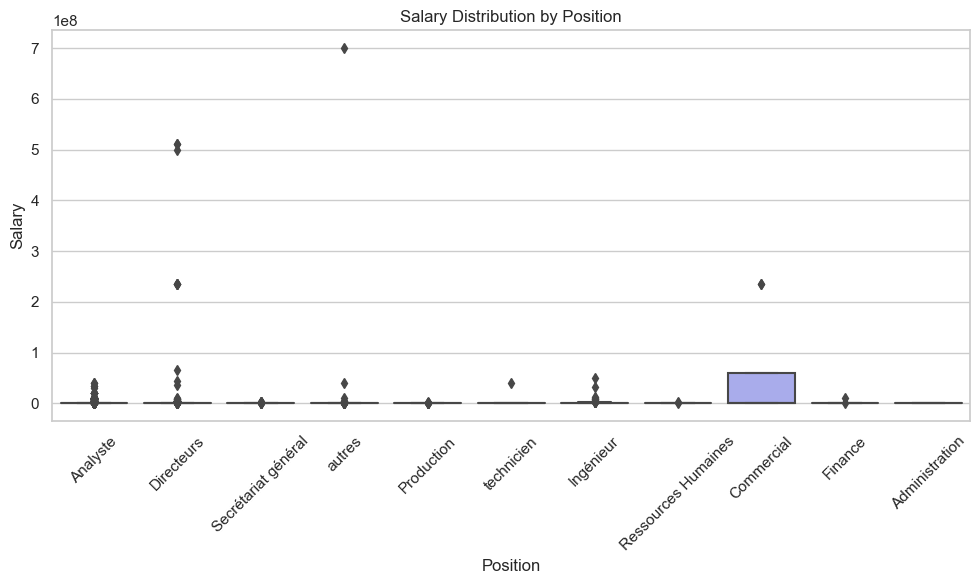

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x="ASSIGNMENT_JOB_LIB", y="EMP_SALARY", data=merge)

# Add labels and title
plt.xlabel("Position")
plt.ylabel("Salary")
plt.title("Salary Distribution by Position")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

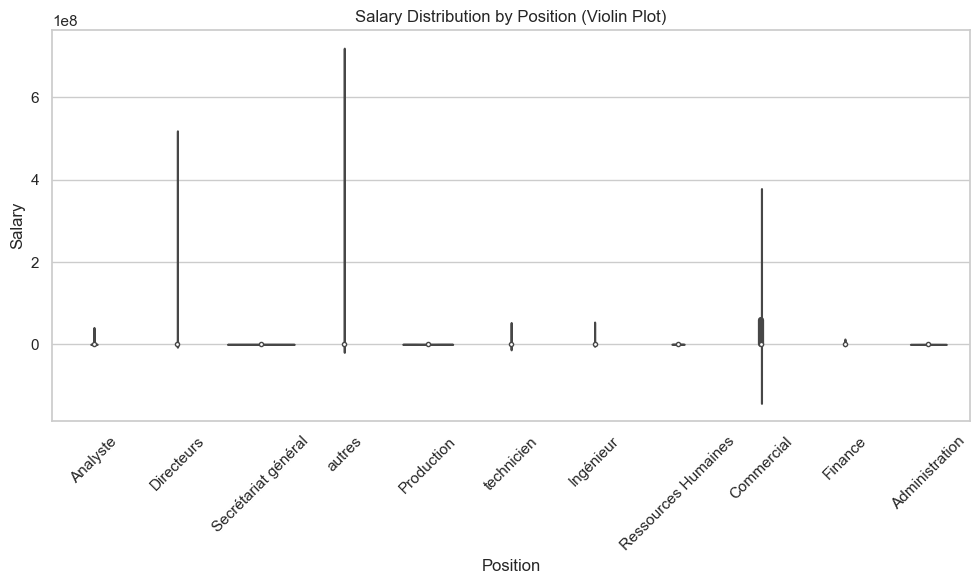

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame with columns "position" and "salary"

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.violinplot(x="ASSIGNMENT_JOB_LIB", y="EMP_SALARY", data=merge)

# Add labels and title
plt.xlabel("Position")
plt.ylabel("Salary")
plt.title("Salary Distribution by Position (Violin Plot)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [27]:
summary_stats = merge.groupby("ASSIGNMENT_JOB_LIB")["EMP_SALARY"].describe()

In [28]:
summary_stats

,count,mean,std,min,25%,50%,75%,max
ASSIGNMENT_JOB_LIB,,,,,,,,
Administration,3.0,8.877667e+04,1.049837e+05,27665.0,28165.0,28665.0,119332.5,210000.0
Analyste,2026.0,9.066105e+05,2.586448e+06,20000.0,300000.0,350000.0,450000.0,40000000.0
Commercial,8.0,5.898440e+07,1.086315e+08,300000.0,300000.0,325000.0,59009400.0,234987600.0
Directeurs,3576.0,1.077298e+06,1.672340e+07,200.0,200000.0,270405.0,400000.0,512004600.0
Finance,12.0,1.222000e+06,2.709285e+06,275000.0,338750.0,350000.0,497500.0,9800000.0
Ingénieur,123.0,1.783406e+06,5.615649e+06,3000.0,250000.0,500000.0,990000.0,50000000.0
Production,144.0,2.714462e+05,1.651490e+05,105000.0,233912.5,310000.0,310000.0,2001000.0
Ressources Humaines,16.0,5.237500e+05,4.530912e+05,200000.0,287500.0,375000.0,550000.0,2000000.0
Secrétariat général,855.0,2.378215e+05,1.452095e+05,100000.0,200000.0,209900.0,260000.0,2001000.0


In [32]:
list(merge["EMP_SALARY"])

[350000.0,
 480000.0,
 400000.0,
 200000.0,
 250000.0,
 250000.0,
 200000.0,
 250000.0,
 200000.0,
 250000.0,
 350000.0,
 200000.0,
 400000.0,
 401200.0,
 300000.0,
 421300.0,
 420000.0,
 400000.0,
 421300.0,
 420000.0,
 400000.0,
 400000.0,
 401200.0,
 400000.0,
 401200.0,
 400000.0,
 401200.0,
 400000.0,
 401200.0,
 250000.0,
 600000.0,
 350000.0,
 300000.0,
 350025.0,
 300000.0,
 300000.0,
 200000.0,
 300000.0,
 300000.0,
 320000.0,
 250000.0,
 340000.0,
 350000.0,
 35000000.0,
 350000.0,
 35000000.0,
 20000000.0,
 350000.0,
 20000000.0,
 350000.0,
 600000.0,
 200600.0,
 200000.0,
 200600.0,
 200000.0,
 300900.0,
 300000.0,
 150400.0,
 150000.0,
 200000.0,
 230000.0,
 345000.0,
 510000.0,
 200000.0,
 300000.0,
 340000.0,
 310000.0,
 510000.0,
 200000.0,
 300000.0,
 340000.0,
 310000.0,
 262500.0,
 145000.0,
 175000.0,
 210000.0,
 315000.0,
 186000.0,
 220000.0,
 400000.0,
 300000.0,
 350000.0,
 350025.0,
 300000.0,
 600000.0,
 300000.0,
 650000.0,
 350025.0,
 250000.0,
 3050000.0,
 

In [33]:
num_groups = 12
min_salary = min(list(merge["EMP_SALARY"]))
max_salary = max(list(merge["EMP_SALARY"]))
interval_width = (max_salary - min_salary) / num_groups
interval_boundaries = [min_salary + i * interval_width for i in range(num_groups + 1)]